In [64]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# userId = Unique number given to each user.
# tier = Tier of the city in which the user is residing.
# gender = Categorical feature representing the gender of the user. 1 represents male and 2 represents female.
# following_rate =	Number of accounts followed by the user(feature is normalized)
# followers_avg_age = Average of age groups of all the followers of the user.
# following_avg_age=	Average of age groups of all the accounts followed by the user.
# max_repetitive_punc=	Maximum repititive punctuations found in the bio and comments of the user.
# num_of_hashtags_per_action	=Average nubmer of hashtags used by the user per comment.
# emoji_count_per_action	=Average number of emojis used by the user per comment.
# punctuations_per_action=	Average number of punctuations used by the user per comment.
# number_of_words_per_action	=Average number of words used by the user per comment.
# avgCompletion =Average watch time completion rate of the videos.
# avgTimeSpent=	Average time spent by the user on a video in seconds.
# avgDuration	=Average duration of the videos that the user has watched till date.
# avgComments	=Average number of comments per video watched.
# creations	Total number of videos uploaded by the user.
# content_views=	Total number of videos watched.
# num_of_comments=	Total number of comments made by the user (normalized)
# weekends_trails_watched_per_day=	Number of videos watched on weekends per day.
# weekdays_trails_watched_per_day	=Number of videos watched on weekdays per day.
# slot1_trails_watched_per_day	=The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot2_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot3_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot4_trails_watched_per_day=	data
# avgt2=	Average number of followers of all the accounts followed by the user.
# age_group=	This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups,
# 1: <18y;
# 2: 18-24y;
# 3: 24-30y;
# 4: \>30y

In [65]:
df = pd.read_csv("C:/Users/Paras Gahlot/OneDrive/Desktop/Research paper/SocialMediaUsage.csv")


In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [66]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.head()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [6]:
df.isnull().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

In [7]:
# X = df.drop('avgCompletion',axis=1)
# y = df['avgCompletion']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)
# X_train.head()

In [9]:
print(df.describe())


             userId           tier         gender  following_rate  \
count  4.888770e+05  488877.000000  488877.000000   488877.000000   
mean   4.236096e+07       1.975382       1.213037        0.082233   
std    1.821664e+07       0.430707       0.409454        2.467781   
min    2.700000e+01       1.000000       1.000000        0.000000   
25%    3.537599e+07       2.000000       1.000000        0.000000   
50%    4.336270e+07       2.000000       1.000000        0.000000   
75%    5.370523e+07       2.000000       1.000000        0.008621   
max    7.904203e+07       3.000000       2.000000      895.304000   

       followers_avg_age  following_avg_age  max_repetitive_punc  \
count      488877.000000      488877.000000        488877.000000   
mean            0.347520           0.403049             0.739748   
std             0.816334           0.925291             3.075954   
min             0.000000           0.000000             0.000000   
25%             0.000000           0.0

In [10]:
print(df['tier'].value_counts())
print(df['gender'].value_counts())

tier
2    397890
1     51511
3     39476
Name: count, dtype: int64
gender
1    384728
2    104149
Name: count, dtype: int64


<Axes: >

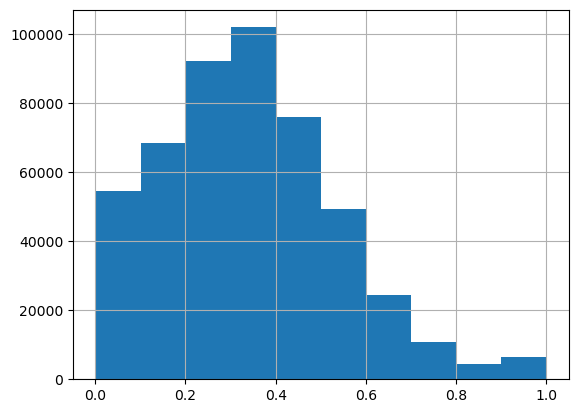

In [11]:
df['avgCompletion'].hist()

<Axes: >

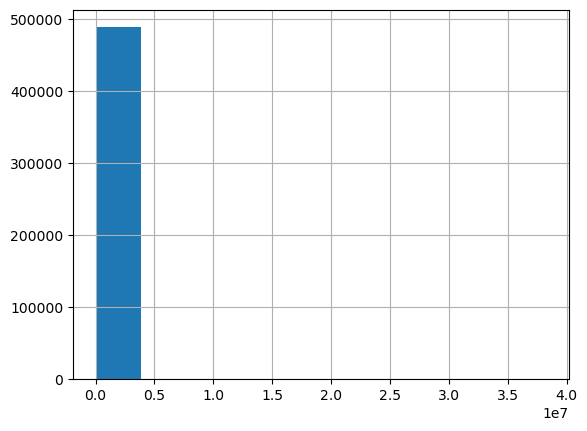

In [12]:
df['avgTimeSpent'].hist()

<Axes: >

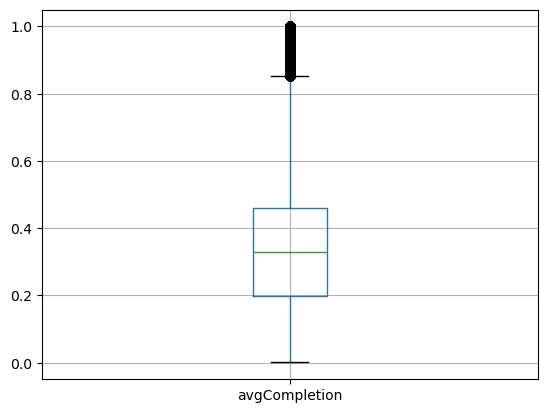

In [13]:
df.boxplot(column='avgCompletion')


<Axes: >

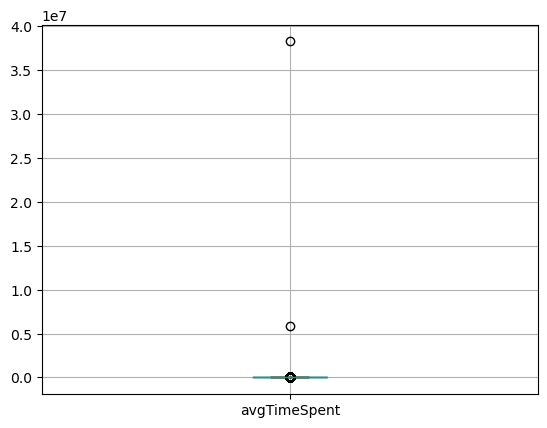

In [14]:
df.boxplot(column='avgTimeSpent')

In [15]:
df.head()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


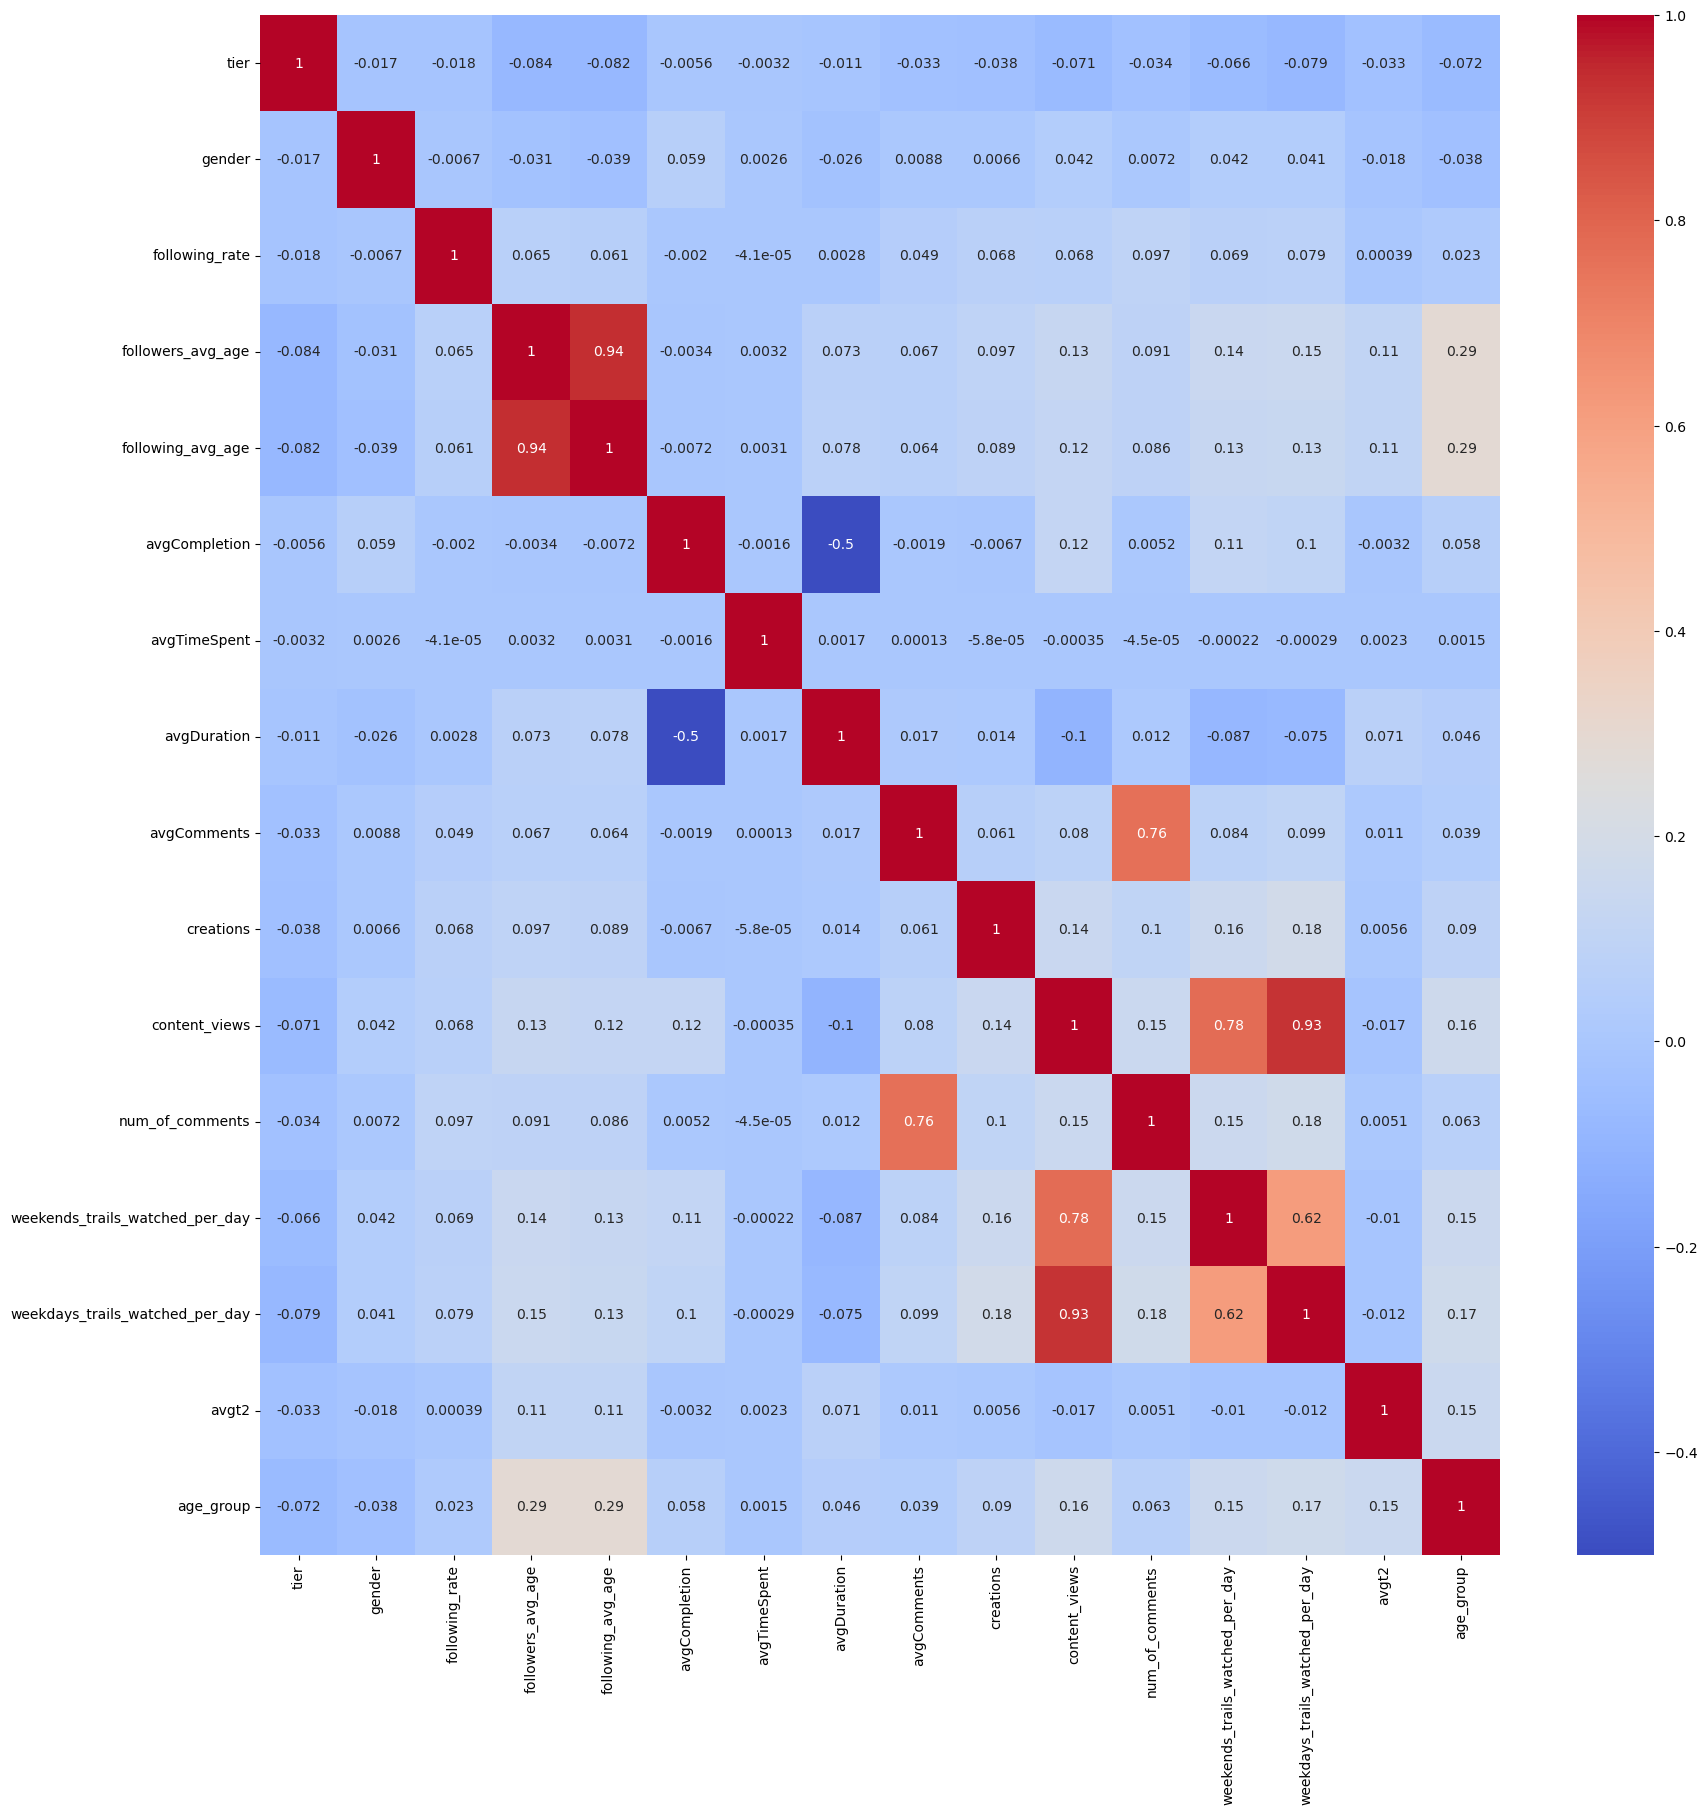

In [67]:

df_for_corr = df.drop(columns=["userId","max_repetitive_punc", "num_of_hashtags_per_action", "emoji_count_per_action", "punctuations_per_action", "number_of_words_per_action","slot1_trails_watched_per_day","slot2_trails_watched_per_day","slot3_trails_watched_per_day","slot4_trails_watched_per_day"])
plt.figure(figsize=(20,20))
corr_matrix = df_for_corr.corr()
sna.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

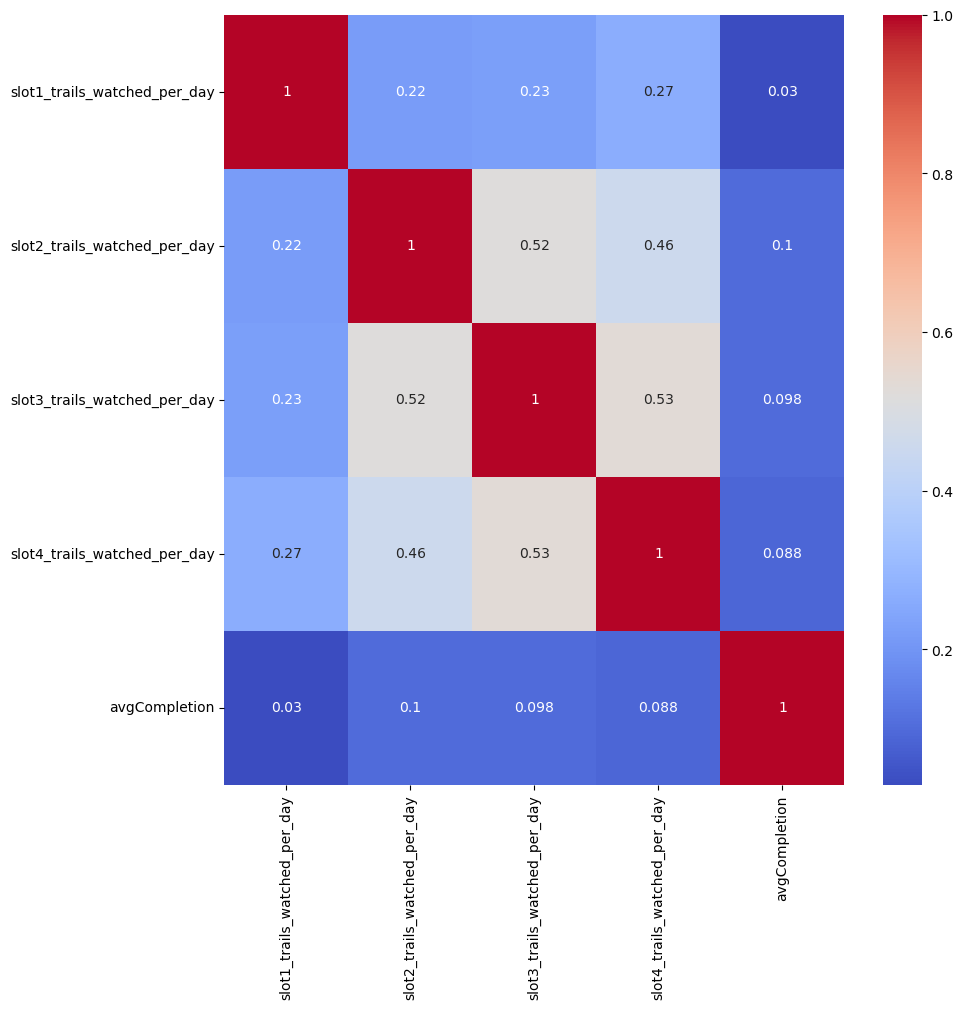

In [68]:

features =["slot1_trails_watched_per_day","slot2_trails_watched_per_day","slot3_trails_watched_per_day","slot4_trails_watched_per_day","avgCompletion"]

plt.figure(figsize=(10,10))
corr_matrix2 = df[features].corr()
sna.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='gender', ylabel='avgCompletion'>

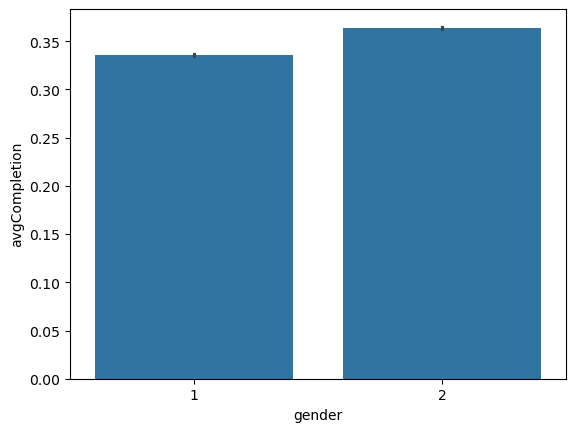

In [18]:
sna.barplot(x='gender', y='avgCompletion', data=df)


<Axes: xlabel='tier', ylabel='avgCompletion'>

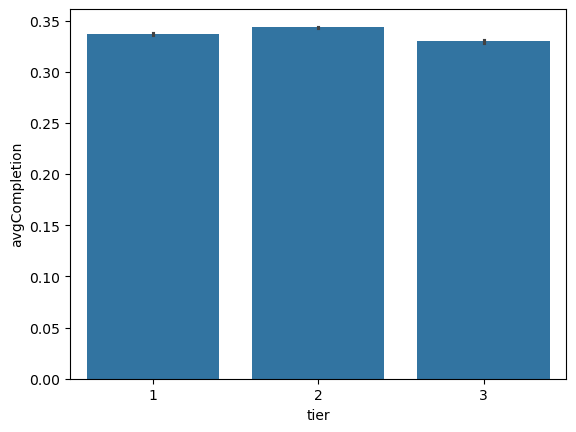

In [19]:
sna.barplot(x='tier', y='avgCompletion', data=df)

In [20]:
print(df.groupby('age_group')['avgCompletion'].mean())

age_group
1    0.334491
2    0.339283
3    0.354017
4    0.367427
Name: avgCompletion, dtype: float64


In [21]:
print(df.groupby('tier')['avgCompletion'].mean())

tier
1    0.336847
2    0.343384
3    0.329600
Name: avgCompletion, dtype: float64


In [22]:
print(df.groupby('gender')['avgCompletion'].mean())

gender
1    0.335551
2    0.363861
Name: avgCompletion, dtype: float64


In [23]:
from scipy import stats

z_scores = stats.zscore(df['avgCompletion'])
df['z_score'] = z_scores
df[df['z_score'].abs() > 3].head()  # Outliers beyond 3 standard deviations


,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,z_score
22,47299417,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.004132,0.000000,0.0,0.000000,0.0,0.008264,0.0,1,3.222264
280,56820770,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.001887,0.0,0.009434,0.0,0.000000,0.0,1,3.368879
314,62348370,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.006494,0.000000,0.0,0.012987,0.0,0.000000,0.0,1,3.224240
326,44514887,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.003279,0.0,0.016393,0.0,0.000000,0.0,1,3.368879
343,2292117,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.000771,0.0,0.000000,0.0,0.003854,0.0,2,3.361216


In [24]:
df = df.drop(columns=["userId", "max_repetitive_punc", "emoji_count_per_action", "punctuations_per_action", "number_of_words_per_action", "avgt2", "avgComments", "creations"])


In [25]:
df.drop(columns=["z_score"],inplace=True)

In [26]:
df.drop(columns=["num_of_hashtags_per_action"],inplace=True)

In [27]:
df.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,avgCompletion,avgTimeSpent,avgDuration,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,age_group
0,2,1,0.0,0.0,0.0,0.463330,34.160000,53.996091,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,1
1,2,2,0.0,0.0,0.0,0.429468,15.285714,96.231625,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,2
2,2,1,0.0,0.0,0.0,0.341657,22.000000,83.051415,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,1
3,2,1,0.0,0.0,0.0,0.005735,3.000000,523.080000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,1
4,2,2,0.0,0.0,0.0,0.456549,12.333333,53.766640,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,1


In [33]:
X = df.drop(columns=['avgCompletion'])  # Features
y = df['avgCompletion']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R²:", r2_score(y_test, y_pred_linear))

Linear Regression:
MAE: 0.12864626980161167
MSE: 0.028597633285064754
R²: 0.2504774404814962


In [32]:
# rf_model = RandomForestRegressor(random_state=1)
# rf_model.fit(X_train, y_train)

In [33]:
# y_pred_rf = rf_model.predict(X_test)
# print("\nRandom Forest:")
# print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("MSE:", mean_squared_error(y_test, y_pred_rf))
# print("R²:", r2_score(y_test, y_pred_rf))


In [36]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [37]:
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting:
MAE: 0.06849996367612804
MSE: 0.00883754965767597
R²: 0.7683744394766907


In [38]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 0.06428654776796897
MSE: 0.008271937916926536
R²: 0.783198699771043


In [40]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor:")
print(f"MAE: {mae_knn}")
print(f"MSE: {mse_knn}")
print(f"R²: {r2_knn}")

KNN Regressor:
MAE: 0.0750607886151898
MSE: 0.011041406422767555
R²: 0.7106130035243563


In [42]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred_tree = tree.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor:")
print(f"MAE: {mae_tree}")
print(f"MSE: {mse_tree}")
print(f"R²: {r2_tree}")

Decision Tree Regressor:
MAE: 0.0894021097669799
MSE: 0.0163539820301486
R²: 0.5713743739780655


In [44]:
df.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,avgCompletion,avgTimeSpent,avgDuration,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,age_group
0,2,1,0.0,0.0,0.0,0.463330,34.160000,53.996091,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,1
1,2,2,0.0,0.0,0.0,0.429468,15.285714,96.231625,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,2
2,2,1,0.0,0.0,0.0,0.341657,22.000000,83.051415,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,1
3,2,1,0.0,0.0,0.0,0.005735,3.000000,523.080000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,1
4,2,2,0.0,0.0,0.0,0.456549,12.333333,53.766640,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,1


In [46]:

# Coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Create a DataFrame to display feature names and their coefficients
feature_names = X_train.columns
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
print(coef_df)


                                  Coefficient
tier                            -4.998054e-04
gender                           2.197803e-02
following_rate                  -4.445825e-04
followers_avg_age                9.977264e-04
following_avg_age                6.063775e-04
avgTimeSpent                    -3.830908e-09
avgDuration                     -1.291667e-03
content_views                    5.229221e-03
num_of_comments                 -1.981719e-02
weekends_trails_watched_per_day -1.315951e+00
weekdays_trails_watched_per_day -3.370724e+00
slot1_trails_watched_per_day     6.576874e-01
slot2_trails_watched_per_day     6.807437e-01
slot3_trails_watched_per_day     6.779809e-01
slot4_trails_watched_per_day     6.707068e-01
age_group                        1.312365e-02


In [47]:
# Feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                 Importance
avgDuration                        0.433896
avgTimeSpent                       0.379951
content_views                      0.063582
weekdays_trails_watched_per_day    0.021766
slot4_trails_watched_per_day       0.016176
slot3_trails_watched_per_day       0.015672
slot2_trails_watched_per_day       0.015443
weekends_trails_watched_per_day    0.014282
following_rate                     0.010693
age_group                          0.006240
slot1_trails_watched_per_day       0.006093
tier                               0.003866
gender                             0.003213
followers_avg_age                  0.003065
following_avg_age                  0.003045
num_of_comments                    0.003019


In [48]:
importances = gb_model.feature_importances_
importance_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                 Importance
avgDuration                        0.510911
avgTimeSpent                       0.452533
content_views                      0.033806
weekends_trails_watched_per_day    0.001053
weekdays_trails_watched_per_day    0.000801
following_rate                     0.000267
slot4_trails_watched_per_day       0.000200
age_group                          0.000174
num_of_comments                    0.000124
slot2_trails_watched_per_day       0.000081
slot1_trails_watched_per_day       0.000039
slot3_trails_watched_per_day       0.000011
tier                               0.000000
gender                             0.000000
followers_avg_age                  0.000000
following_avg_age                  0.000000


In [28]:

df_new = pd.read_csv("C:/Users/Paras Gahlot/OneDrive/Desktop/Research paper/SocialMediaUsage.csv")

In [29]:
df_new.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [30]:
import pandas as pd
from scipy import stats

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# List of continuous features to check correlation with avgCompletion
continuous_features = [
    'following_rate', 'avgTimeSpent', 'number_of_words_per_action',
    'avgDuration', 'weekdays_trails_watched_per_day', 
    'weekends_trails_watched_per_day', 'emoji_count_per_action',
    'creations', 'content_views'
]

# Loop through each feature and calculate Pearson correlation with avgCompletion
for feature in continuous_features:
    corr, p_value = stats.pearsonr(df_new[feature], df_new['avgCompletion'])
    print(f'Feature: {feature}')
    print(f'Pearson Correlation: {corr}, P-value: {p_value}')
    if p_value < 0.05:
        print(f'The correlation between {feature} and avgCompletion is statistically significant.\n')
    else:
        print(f'The correlation between {feature} and avgCompletion is not statistically significant.\n')


Feature: following_rate
Pearson Correlation: -0.001990839447076095, P-value: 0.1639261591709836
The correlation between following_rate and avgCompletion is not statistically significant.

Feature: avgTimeSpent
Pearson Correlation: -0.0016370727970323963, P-value: 0.2523604377659586
The correlation between avgTimeSpent and avgCompletion is not statistically significant.

Feature: number_of_words_per_action
Pearson Correlation: -0.0054363727357363955, P-value: 0.0001440458235795938
The correlation between number_of_words_per_action and avgCompletion is statistically significant.

Feature: avgDuration
Pearson Correlation: -0.5004012157190215, P-value: 0.0
The correlation between avgDuration and avgCompletion is statistically significant.

Feature: weekdays_trails_watched_per_day
Pearson Correlation: 0.09952002800437437, P-value: 0.0
The correlation between weekdays_trails_watched_per_day and avgCompletion is statistically significant.

Feature: weekends_trails_watched_per_day
Pearson Corr

In [31]:
# T-test for gender (binary categorical variable)
male_avgCompletion = df_new[df_new['gender'] == 1]['avgCompletion']
female_avgCompletion = df_new[df_new['gender'] == 2]['avgCompletion']

t_stat, p_value = stats.ttest_ind(male_avgCompletion, female_avgCompletion)
print('T-test for Gender:')
print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < 0.05:
    print('The difference in avgCompletion between genders is statistically significant.\n')
else:
    print('The difference in avgCompletion between genders is not statistically significant.\n')


T-test for Gender:
T-statistic: -41.543646936353106, P-value: 0.0
The difference in avgCompletion between genders is statistically significant.



In [32]:
# ANOVA for age_group (categorical variable with more than two levels)
anova_result_age = stats.f_oneway(
    df_new[df_new['age_group'] == 1]['avgCompletion'],
    df_new[df_new['age_group'] == 2]['avgCompletion'],
    df_new[df_new['age_group'] == 3]['avgCompletion'],
    df_new[df_new['age_group'] == 4]['avgCompletion']
)
print('ANOVA for Age Group:')
print(f'F-statistic: {anova_result_age.statistic}, P-value: {anova_result_age.pvalue}')
if anova_result_age.pvalue < 0.05:
    print('The difference in avgCompletion between age groups is statistically significant.\n')
else:
    print('The difference in avgCompletion between age groups is not statistically significant.\n')

# ANOVA for tier (categorical variable with more than two levels)
anova_result_tier = stats.f_oneway(
    df_new[df_new['tier'] == 1]['avgCompletion'],
    df_new[df_new['tier'] == 2]['avgCompletion'],
    df_new[df_new['tier'] == 3]['avgCompletion']
)
print('ANOVA for Tier:')
print(f'F-statistic: {anova_result_tier.statistic}, P-value: {anova_result_tier.pvalue}')
if anova_result_tier.pvalue < 0.05:
    print('The difference in avgCompletion between tiers is statistically significant.\n')
else:
    print('The difference in avgCompletion between tiers is not statistically significant.\n')


ANOVA for Age Group:
F-statistic: 575.9713953893578, P-value: 0.0
The difference in avgCompletion between age groups is statistically significant.

ANOVA for Tier:
F-statistic: 106.25405130802605, P-value: 7.319449358695722e-47
The difference in avgCompletion between tiers is statistically significant.



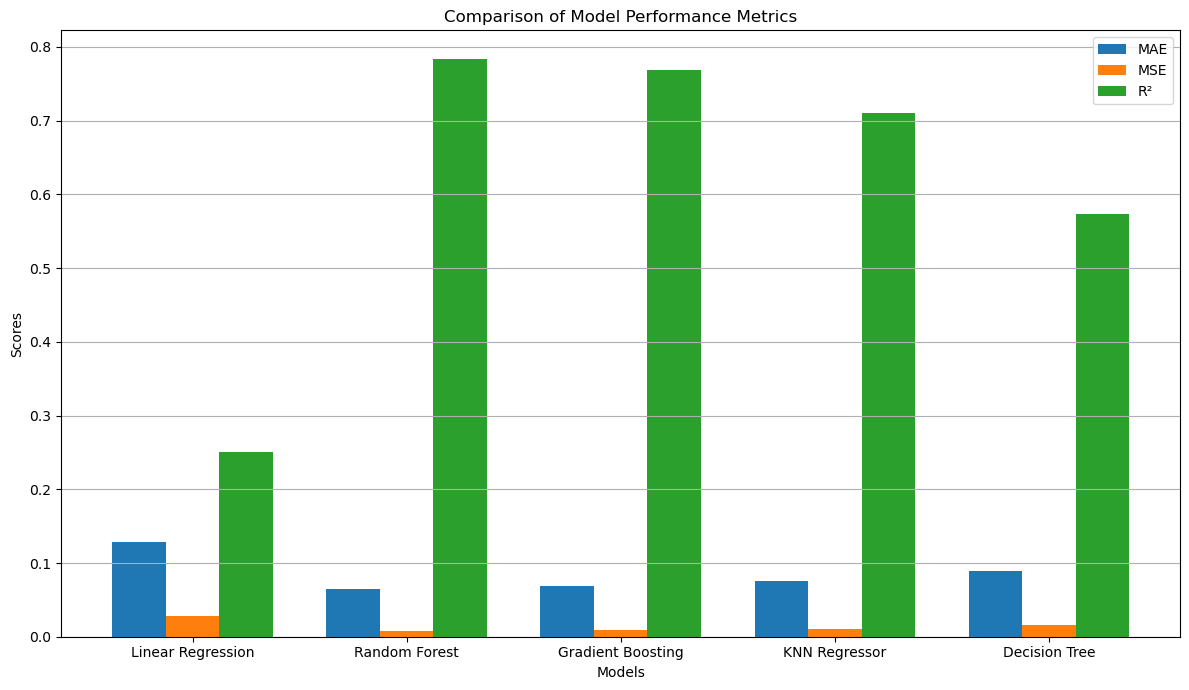

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN Regressor', 'Decision Tree']

# Performance metrics for each model
mae = [0.1286, 0.0643, 0.0685, 0.0751, 0.0893]
mse = [0.0286, 0.0083, 0.0088, 0.0110, 0.0163]
r2 = [0.2505, 0.7834, 0.7684, 0.7106, 0.5728]

# X-axis locations for the groups of bars
x = np.arange(len(models))

# Width of the bars
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))

# Plotting the bars
bars1 = ax.bar(x - width, mae, width, label='MAE')
bars2 = ax.bar(x, mse, width, label='MSE')
bars3 = ax.bar(x + width, r2, width, label='R²')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding a grid
ax.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


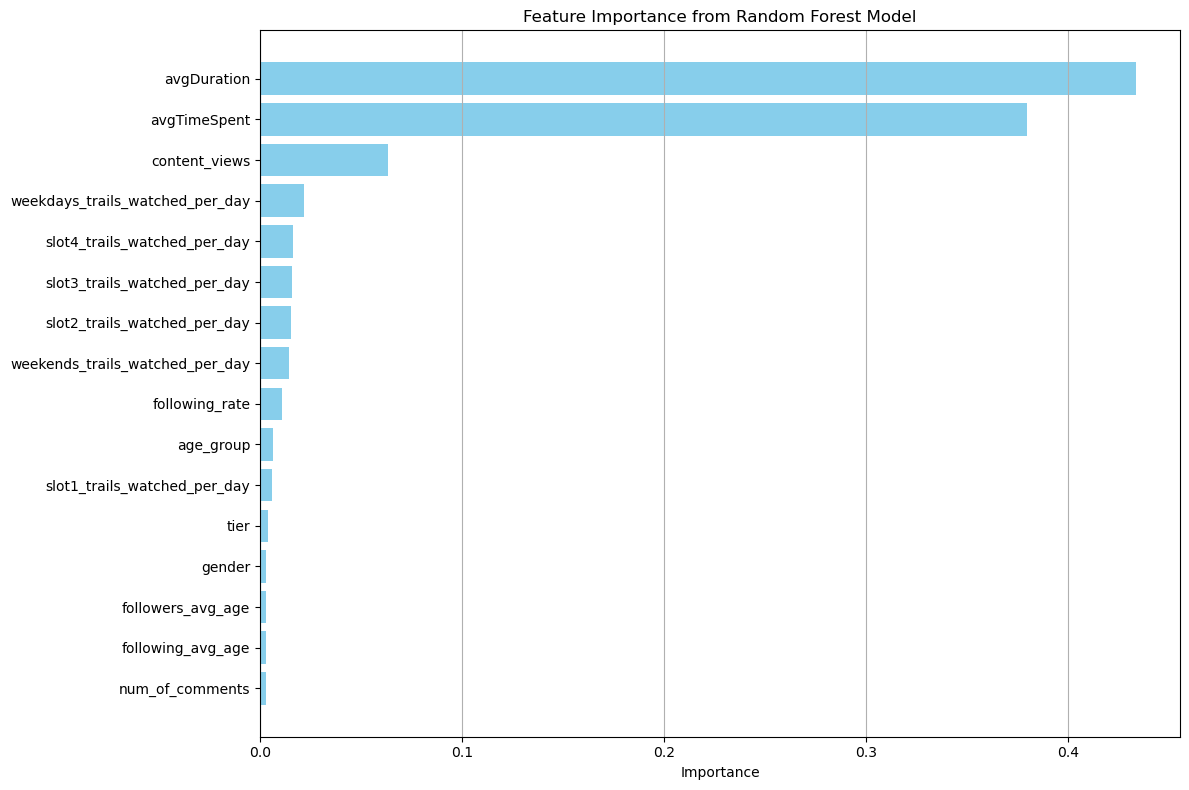

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names and their importance scores from the Random Forest model
features = [
    'avgDuration', 'avgTimeSpent', 'content_views', 'weekdays_trails_watched_per_day',
    'slot4_trails_watched_per_day', 'slot3_trails_watched_per_day', 'slot2_trails_watched_per_day',
    'weekends_trails_watched_per_day', 'following_rate', 'age_group', 'slot1_trails_watched_per_day',
    'tier', 'gender', 'followers_avg_age', 'following_avg_age', 'num_of_comments'
]

importances = [
    0.433896, 0.379951, 0.063582, 0.021766, 0.016176, 0.015672, 0.015443, 0.014282,
    0.010693, 0.006240, 0.006093, 0.003866, 0.003213, 0.003065, 0.003045, 0.003019
]

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]
features_sorted = np.array(features)[sorted_indices]
importances_sorted = np.array(importances)[sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(features_sorted, importances_sorted, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x')

# Display the plot
plt.tight_layout()
plt.show()


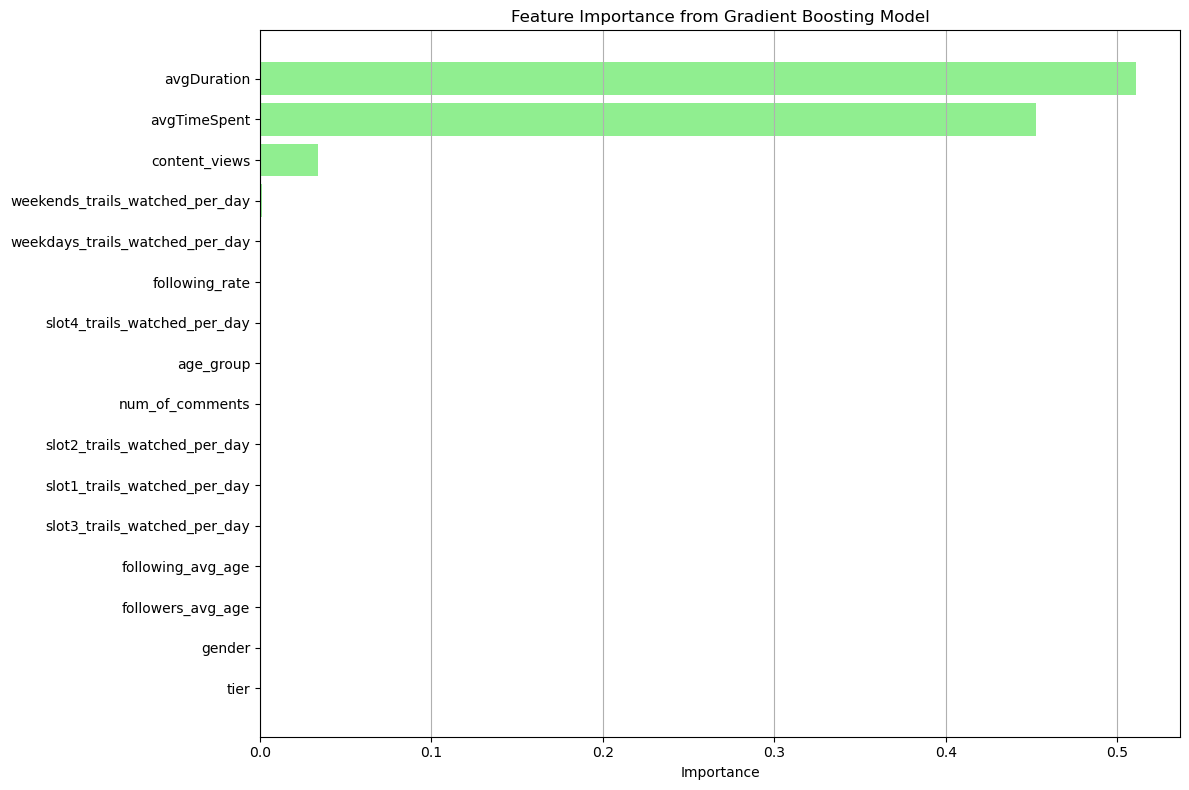

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names and their importance scores from the Gradient Boosting model
features = [
    'avgDuration', 'avgTimeSpent', 'content_views', 'weekends_trails_watched_per_day',
    'weekdays_trails_watched_per_day', 'following_rate', 'slot4_trails_watched_per_day',
    'age_group', 'num_of_comments', 'slot2_trails_watched_per_day', 'slot1_trails_watched_per_day',
    'slot3_trails_watched_per_day', 'tier', 'gender', 'followers_avg_age', 'following_avg_age'
]

importances = [
    0.510911, 0.452533, 0.033806, 0.001053, 0.000801, 0.000267, 0.000200, 0.000174,
    0.000124, 0.000081, 0.000039, 0.000011, 0.000000, 0.000000, 0.000000, 0.000000
]

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]
features_sorted = np.array(features)[sorted_indices]
importances_sorted = np.array(importances)[sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(features_sorted, importances_sorted, color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Paras Gahlot\AppData\Local\Temp\ipykernel_15820\4084659173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')


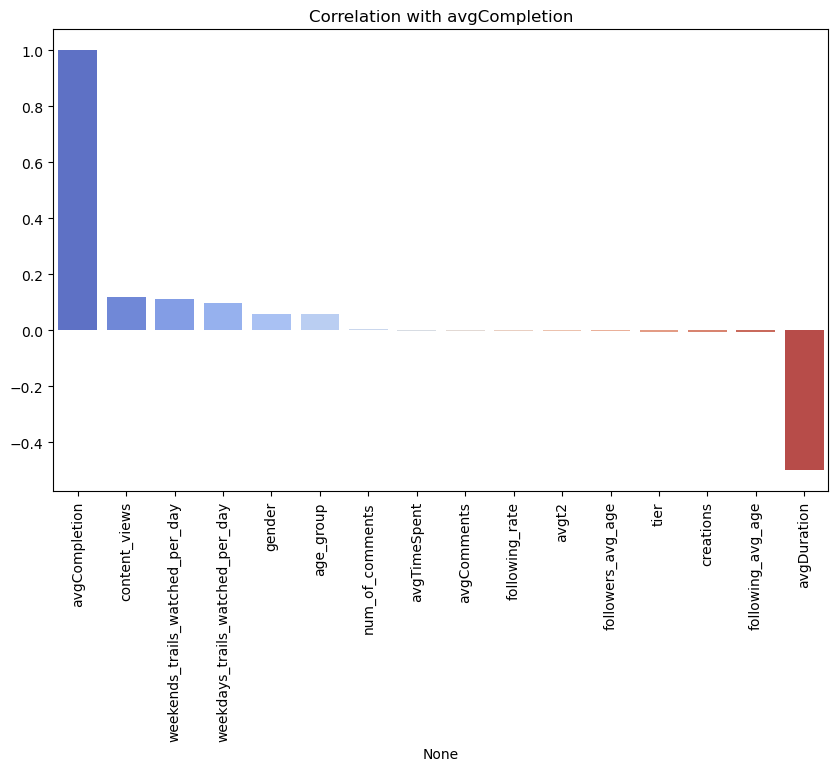

In [69]:
corr_target = corr_matrix['avgCompletion'].sort_values(ascending=False)  # Replace 'avgCompletion' with your target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with avgCompletion')
plt.show()
